# Geopandas & Rioxarray

**Data manipulation** and representation is a huge part of any field. When it comes to geospacial data there are 2 main libraries in python to help you with writing, reading and manipulating raster geospacial datasets.

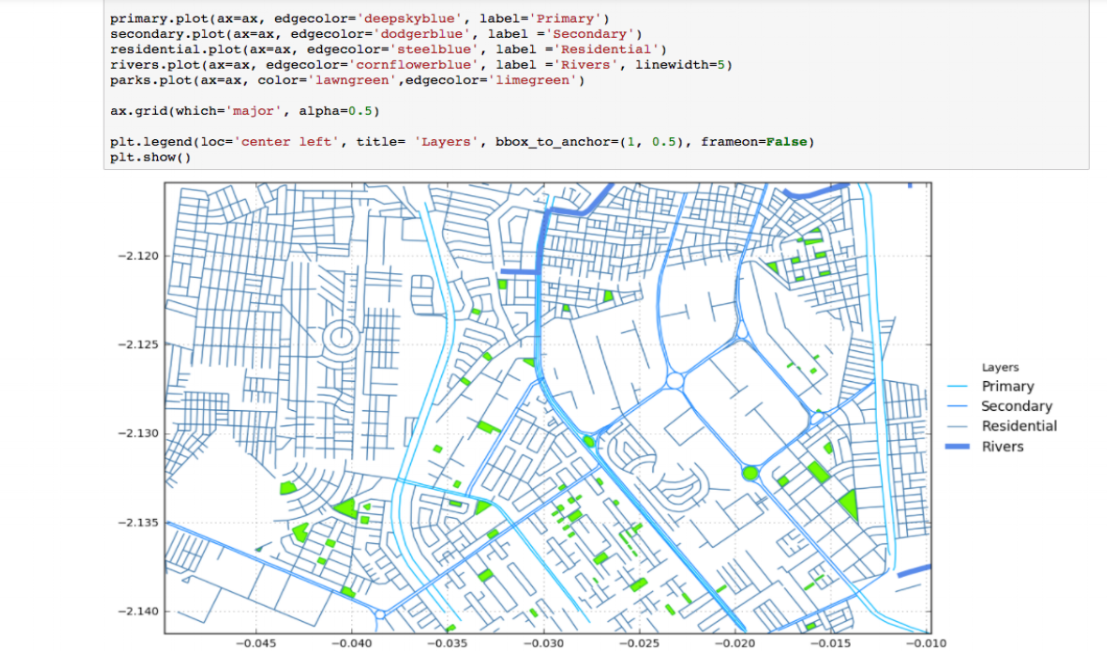

### Geopandas

GeoPandas is a handy tool in Python for working with geographic data. It makes tasks like __**analyzing**__, __**visualizing**__, and __**manipulating**__ spatial data easier by extending the capabilities of pandas, a popular data manipulation library. 

With GeoPandas, you can effortlessly handle different types of geographic objects and perform various spatial operations, all within a familiar pandas-like environment!

#### Installing Geopandas

Before getting started with geospatial data analysis using Geopandas and Rioxarray, lets first install the required Python packages. Geopandas can be installed via pip, which will automatically handle the installation of its dependencies, including Pandas, Shapely, Fiona, and Pyproj. 

Open your terminal or command prompt and run the following command:

In [1]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Understanding GeoDataFrames in GeoPandas

A GeoDataFrame is one of the fundamental data structures in GeoPandas, designed specifically for geospatial data analysis. It extends the functionalities of **pandas DataFrames** by adding geographic operations on geometric types. 

GeoDataFrames make it convenient to work with geospatial data in vector format, which includes points, lines, polygons, and multipolygons.

### Structure of a GeoDataFrame

A GeoDataFrame is essentially a pandas DataFrame but with an additional column for geometry. This geometry column is a GeoSeries—every entry in it is a set of geometric objects or a single geometric object, depending on the data.

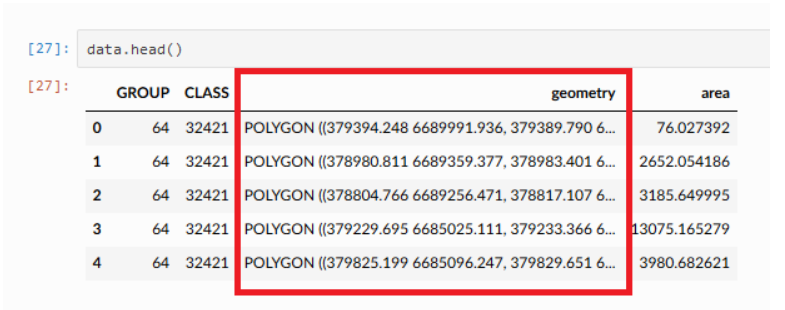

### Rioxarray

Rioxarray is a Python library designed to enhance the capabilities of xarray for geospatial data analysis. It seamlessly integrates with xarray, providing functionalities tailored for handling raster geospatial datasets. With rioxarray, users can effortlessly perform operations such as reprojection, resampling, clipping, and masking on multidimensional arrays representing geospatial data.

#### Installing Rioxarray

Similar to geopandas, we can use pip to install Rioxarray. Run the following command in your terminal or command prompt:

In [2]:
pip install rioxarray

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## What is a raster?

A raster, in the context of geospatial data, comprises matrices of discrete cells representing features on, above, or below the Earth's surface in a two-dimensional grid format. 

Each cell within the raster grid is of uniform size and shape, typically rectangular, ensuring consistent spatial representation across the dataset. 

In software like QGIS, these raster grids are always represented as rectangles.

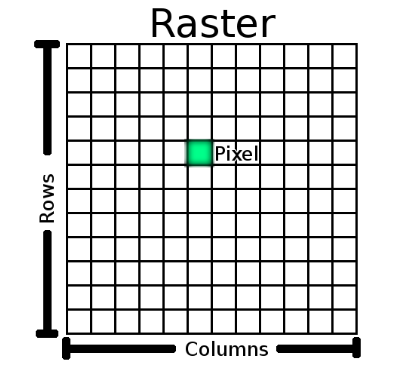

## What is a vector?

A vector represents the location and shape of geographic features using points, lines, and polygons, often including a Z component for 3D data. 

Attributes like names and classifications are associated with these features. 

Typically used for discrete features such as roads, buildings, and rivers, vector data is integral to geographic information systems (GIS) and urban planning.
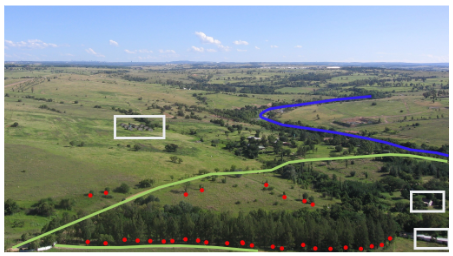

## Geopandas

Extends the pandas and shapely library to make working with geospatial vector data easier


Also uses the packages fiona and matplotlib for certain methods


Makes plotting, editing, manipulation, creating and analysing geospatial vector data a breeze! 


Add the “helheim.tif” and “traces.gpkg”.



Make a new notebook (make sure it's in the geospatial kernel) 


### Open the raster and explore

In [3]:
import rioxarray
# Open into an xarray.DataArray
bed = rioxarray.open_rasterio('helheim_bed.tif')
# Covert our xarray.DataArray into a xarray.Dataset
bed = bed.to_dataset('band')
# Rename the variable to a more useful name
bed = bed.rename({1: 'Bed (m)'})

### Plot the image 

Text(0.5, 1.0, 'Helheim Glacier')

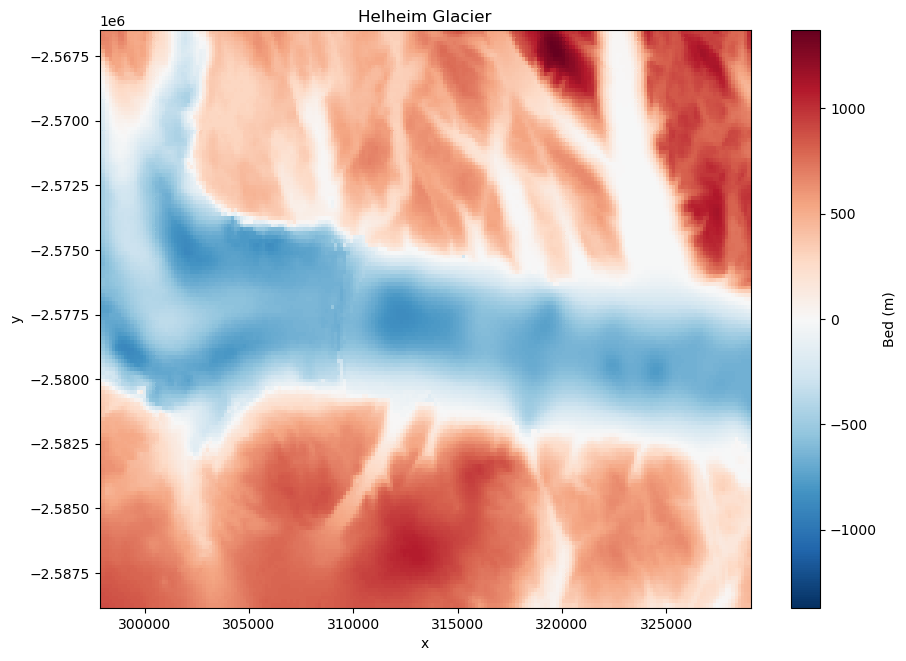

In [5]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (10.5,7.5))

bed['Bed (m)'].plot(ax=ax)
ax.set_title('Helheim Glacier')

### Open up the vector data

In [10]:
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_columns',None)

traces = gpd.read_file('traces.gpkg')
#show the first 5 rows and the columns to explore the data
traces.head()

,GlacierID,Date,Year,Month,Day,DecDate,QualFlag,Satellite,ImageID,Author,Center_X,Center_Y,geometry
0,181,2000-03-31,2000,3,31,2000.245902,05,Landsat,LE07_L1TP_233013_20000331_20170212_01_T2,Murray,-38.052327,66.352346,"MULTILINESTRING ((314007.573 -2581003.668, 314..."
1,181,2000-05-27,2000,5,27,2000.401639,05,Landsat,"LE07_L1TP_232013_20000527_20170211_01_T1,LE07_...",Murray,-38.048509,66.352967,"MULTILINESTRING ((315021.000 -2575349.397, 314..."
2,181,2000-06-28,2000,6,28,2000.489071,05,Landsat,"LE07_L1TP_232013_20000628_20170211_01_T1,LE07_...",Murray,-38.052223,66.352409,"MULTILINESTRING ((314737.242 -2575410.179, 314..."
3,181,2000-07-05,2000,7,5,2000.508197,05,Landsat,LE07_L1TP_233013_20000705_20170211_01_T1,Murray,-38.051529,66.351270,"MULTILINESTRING ((314107.274 -2581103.368, 314..."
4,181,2000-08-15,2000,8,15,2000.620219,05,Landsat,"LE07_L1TP_232013_20000815_20170210_01_T1,LE07_...",Murray,-38.055578,66.353364,"MULTILINESTRING ((314645.009 -2575404.730, 314..."


### Plot the data 

<AxesSubplot:>

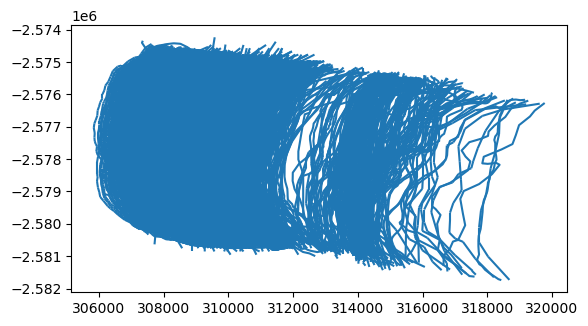

In [7]:
traces.plot()

### Exersizes

1) Load the raster file 'helheim_bed.tif' using Rioxarray. Display the central value of the raster. What might this value represent?

2) Using GeoPandas, load 'traces.gpkg' and filter to include only those features where the length of the 'geometry' attribute (i.e. the cross-sectional length of the glacier terminus) is greater than 7000 meters (read in the traces.gpkg file as 'traces' and use the traces.length function on the 'geometry' attribute). How many features satisfy this condition?

### Answers

1) Load the raster file 'helheim_bed.tif' using Rioxarray. Display the central value of the raster. What might this value represent?

In [8]:
import rioxarray
# Load the raster data
bed = rioxarray.open_rasterio('helheim_bed.tif')
# Display the central value
central_value = bed.sel(x=bed.x[int(bed.x.size / 2)], y=bed.y[int(bed.y.size / 2)], method='nearest')
print("Central raster value:", central_value.values)

Central raster value: [-803.0624]


2) Using GeoPandas, load 'traces.gpkg' and filter to include only those features where the length of the 'geometry' attribute (i.e. the cross-sectional length of the glacier terminus) is greater than 7000 meters (read in the traces.gpkg file as 'traces' and use the traces.length function on the 'geometry' attribute). How many features satisfy this condition?

In [19]:
import geopandas as gpd
# Load vector data
traces = gpd.read_file('traces.gpkg')
# Filter data
trace_length = traces[traces['geometry'].length > 7000]
print("Number of features with area > 7000:", trace_length.shape[0])

Number of features with area > 7000: 684
